# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations
    As expected, as you move away from the equator the tempature gets colder in the northern hemisphere (r^2 = -.65) and as you move closer to the equator in the southern hemisphere the tempature gets warmer (r^2 = 0.74).
    
    With an r^2 value of -0.01 we can say that there is a very weak to no effect size of latitude and humidity in the northern hemisphere. This is also true with humidity in the southern hemisphere as the effect size is very weak with r^2 = 0.05.
    
    There is a very weak to no effect size for latitude and cloudiness in the northern hemisphere (r^2 = -0.03) as well as in the southern hemisphere (r^2 = 0.01). These observations can also be made with latitude and wind speed in both hemispheres as well (Northern; r^2 = -0.02, Southern; r^2 = -0.12)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set up base URL to pull data & units to imperial to avoid converting kelvin to fahrenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#set lists to hold data
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
index = 0

#Loop through weather df to populate table, add print statements based off starter code
print("Beginning Data Retrieval")
print("------------------------------")


for city in cities:
    parameters = {"units": "imperial"}
    
    query_url = base_url + "appid=" + api_key + "&q=" + city
    response = requests.get(query_url, params = parameters).json()
    print(f"Processing Record {index} | {city}")    
    
    try:
    #use https://openweathermap.org/current to find whats needed to make calls
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        index = index + 1

        
    except (KeyError, IndexError):
        print("Location not found. Skipping to next city")

print("-------------------------")
print("Data Retrieved")
print("-------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 0 | pitea
Processing Record 1 | kosonsoy
Processing Record 2 | grindavik
Processing Record 3 | castro
Processing Record 4 | tumannyy
Location not found. Skipping to next city
Processing Record 4 | lebu
Processing Record 5 | vaini
Processing Record 6 | belmonte
Processing Record 7 | hermanus
Processing Record 8 | rikitea
Processing Record 9 | taolanaro
Location not found. Skipping to next city
Processing Record 9 | quelimane
Processing Record 10 | punta arenas
Processing Record 11 | sambava
Processing Record 12 | bengkulu
Processing Record 13 | port elizabeth
Processing Record 14 | gouyave
Processing Record 15 | udachnyy
Processing Record 16 | khudumelapye
Processing Record 17 | bandarbeyla
Processing Record 18 | hami
Processing Record 19 | avarua
Processing Record 20 | ushuaia
Processing Record 21 | codrington
Processing Record 22 | busselton
Processing Record 23 | broome
Processing Record 24 | berdigestyakh
Proc

Processing Record 205 | krasnoselkup
Processing Record 206 | salihorsk
Processing Record 207 | kloulklubed
Processing Record 208 | saint-philippe
Processing Record 209 | canico
Processing Record 210 | saleaula
Location not found. Skipping to next city
Processing Record 210 | bacuit
Location not found. Skipping to next city
Processing Record 210 | iqaluit
Processing Record 211 | port hardy
Processing Record 212 | cidreira
Processing Record 213 | faanui
Processing Record 214 | los llanos de aridane
Processing Record 215 | lasa
Processing Record 216 | alofi
Processing Record 217 | hasaki
Processing Record 218 | komsomolskiy
Processing Record 219 | lhokseumawe
Processing Record 220 | maniitsoq
Processing Record 221 | massakory
Processing Record 222 | zyryanka
Processing Record 223 | mullaitivu
Location not found. Skipping to next city
Processing Record 223 | chara
Processing Record 224 | carnarvon
Processing Record 225 | axim
Processing Record 226 | bambous virieux
Processing Record 227 | 

Processing Record 400 | santiago del estero
Processing Record 401 | kayerkan
Processing Record 402 | tual
Processing Record 403 | carauari
Processing Record 404 | nyurba
Processing Record 405 | langxiang
Processing Record 406 | luzilandia
Processing Record 407 | fortuna
Processing Record 408 | lakes entrance
Processing Record 409 | ponta do sol
Processing Record 410 | warri
Processing Record 411 | petropavlovsk-kamchatskiy
Processing Record 412 | yerofey pavlovich
Processing Record 413 | iwanai
Processing Record 414 | bosaso
Processing Record 415 | padang
Processing Record 416 | lai
Processing Record 417 | ahipara
Processing Record 418 | loa janan
Processing Record 419 | kuala krai
Location not found. Skipping to next city
Processing Record 419 | pakxan
Processing Record 420 | damaturu
Processing Record 421 | port hawkesbury
Processing Record 422 | kupang
Processing Record 423 | shimoda
Processing Record 424 | tevaitoa
Processing Record 425 | portland
Processing Record 426 | fermo
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#convert json to dataframe
weather_dict = {
    "city": name,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "country": country,
    "date": date 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Piteå,65.32,21.48,51.80,93,1,3.36,SE,1596595874
1,Kosonsoy,41.26,71.55,82.40,37,60,4.70,UZ,1596595874
2,Grindavik,63.84,-22.43,48.20,100,90,17.22,IS,1596595447
3,Castro,-24.79,-50.01,50.31,93,0,4.59,BR,1596595373
4,Lebu,-37.62,-73.65,51.13,89,43,6.33,CL,1596595322


In [5]:
#save city data to a csv file
weather_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.max()

city              Ürümqi
lat                78.22
lng               179.32
max_temp            98.6
humidity             100
cloudiness           100
wind_speed         27.51
country               ZW
date          1596596019
dtype: object

In [7]:
#No cities that have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

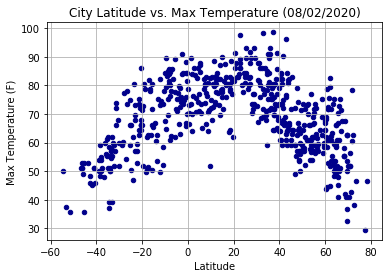

In [8]:
#Latitude vs. Temperature plot

weather_data.plot(kind="scatter", x="lat", y="max_temp", color="darkblue")
plt.title("City Latitude vs. Max Temperature (08/02/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsTemp.png")

## Latitude vs. Humidity Plot

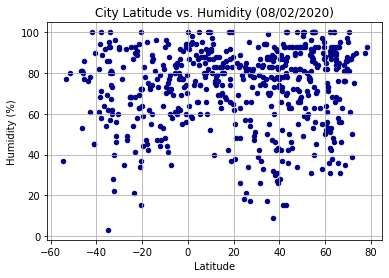

In [9]:
#Latitude vs. hunidity plot

weather_data.plot(kind="scatter", x="lat", y="humidity", color="darkblue")
plt.title("City Latitude vs. Humidity (08/02/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

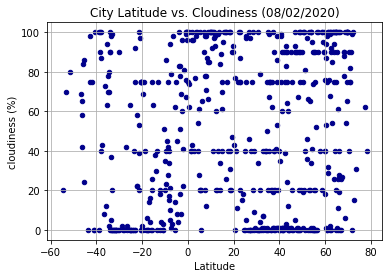

In [10]:
#Latitude vs. Cloudiness plot

weather_data.plot(kind="scatter", x="lat", y="cloudiness", color="darkblue")
plt.title("City Latitude vs. Cloudiness (08/02/2020)")
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

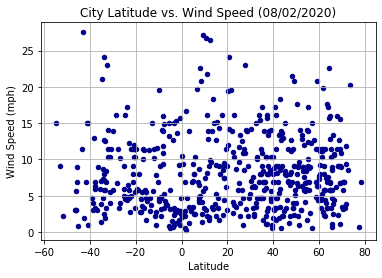

In [11]:
#Latitude vs. Wind Speed plot

weather_data.plot(kind="scatter", x="lat", y="wind_speed", color="darkblue")
plt.title("City Latitude vs. Wind Speed (08/02/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsWindSpeed.png")

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    print(f"The r-squared value is:  {round(st.pearsonr(x_values,y_values)[0],2)}")
    #accessed from Matplotlib class activites
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    linear_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return linear_eq

#create function for annotating line
def anno(linear_eq, a, b):
    plt.annotate(linear_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_data.loc[weather_data["lat"] >= 0, :]
south_hemi = weather_data.loc[weather_data["lat"] < 0, :]

In [14]:
#check north hemisphere
north_hemi.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Piteå,65.32,21.48,51.8,93,1,3.36,SE,1596595874
1,Kosonsoy,41.26,71.55,82.4,37,60,4.70,UZ,1596595874
2,Grindavik,63.84,-22.43,48.2,100,90,17.22,IS,1596595447
14,Gouyave,12.16,-61.73,80.6,83,20,9.17,GD,1596595877
15,Udachny,66.42,112.40,75.2,31,0,4.47,RU,1596595421


In [15]:
#south hemisphere
south_hemi.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
3,Castro,-24.79,-50.01,50.31,93,0,4.59,BR,1596595373
4,Lebu,-37.62,-73.65,51.13,89,43,6.33,CL,1596595322
5,Vaini,-21.20,-175.20,75.20,69,20,6.93,TO,1596595372
6,Belmonte,-15.86,-38.88,71.60,60,20,5.82,BR,1596595527
7,Hermanus,-34.42,19.23,37.00,95,2,8.68,ZA,1596595362


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is:  -0.65


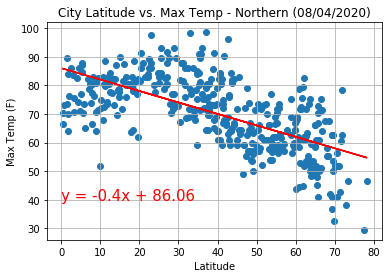

In [24]:
#call in linear equation
eq = linear_regression(north_hemi["lat"], north_hemi["max_temp"])
#call in annotation function
anno(eq, 0, 40)
plt.title("City Latitude vs. Max Temp - Northern (08/04/2020)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsMaxTempLinRegNorth.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is:  0.74


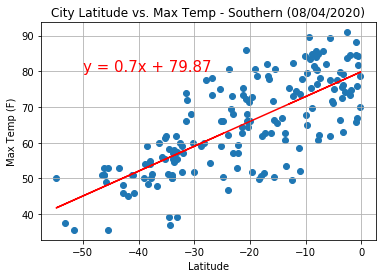

In [25]:
#call in linear equation
eq = linear_regression(south_hemi["lat"], south_hemi["max_temp"])
#call in annotation function
anno(eq, -50, 80)
plt.title("City Latitude vs. Max Temp - Southern (08/04/2020)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsMaxTempLinRegSouth.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is:  -0.01


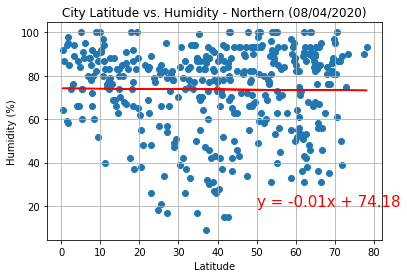

In [26]:
#call in linear equation
eq = linear_regression(north_hemi["lat"], north_hemi["humidity"])
#call in annotation function
anno(eq, 50, 20)
plt.title("City Latitude vs. Humidity - Northern (08/04/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsHumidityNorth.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is:  0.05


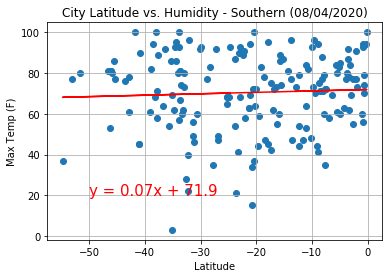

In [27]:
#call in linear equation
eq = linear_regression(south_hemi["lat"], south_hemi["humidity"])
#call in annotation function
anno(eq, -50, 20)
plt.title("City Latitude vs. Humidity - Southern (08/04/2020)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsHumiditySouth.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is:  -0.03


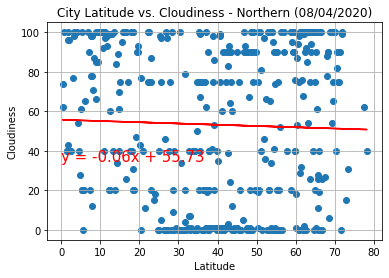

In [28]:
#call in linear equation
eq = linear_regression(north_hemi["lat"], north_hemi["cloudiness"])
#call in annotation function
anno(eq, 0, 35)
plt.title("City Latitude vs. Cloudiness - Northern (08/04/2020)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsCloudinessNorth.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is:  0.01


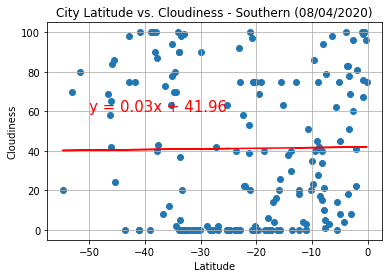

In [29]:
#call in linear equation
eq = linear_regression(south_hemi["lat"], south_hemi["cloudiness"])
#call in annotation function
anno(eq, -50, 60)
plt.title("City Latitude vs. Cloudiness - Southern (08/04/2020)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsCloudinessSouth.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is:  -0.02


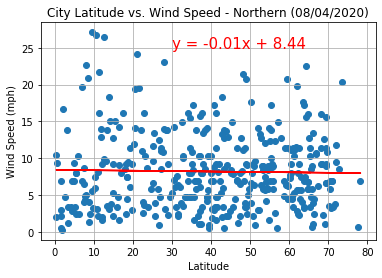

In [30]:
#call in linear equation
eq = linear_regression(north_hemi["lat"], north_hemi["wind_speed"])
#call in annotation function
anno(eq, 30, 25)
plt.title("City Latitude vs. Wind Speed - Northern (08/04/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsWindSpeedNorthern.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is:  -0.12


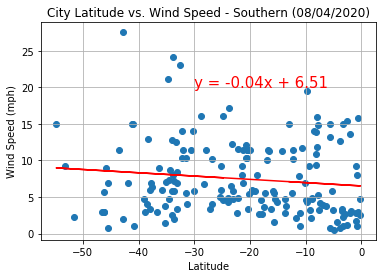

In [31]:
#call in linear equation
eq = linear_regression(south_hemi["lat"], south_hemi["wind_speed"])
#call in annotation function
anno(eq, -30, 20)
plt.title("City Latitude vs. Wind Speed - Southern (08/04/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Analysis Images/LatVsWindSpeedSouth.png")